In [254]:
#@title 
threshold = 0.69 #@param {type:"slider", min:0, max:1, step:0.01}

# Auto POPOP Cat
this works best with audio with little to no background noise (songs wont work that well)

just upload an mp3 or wav file and title it "input.wav", then click play.

it will finish and there'll be another file named "output.mp4"

In [274]:
!git clone https://github.com/spronkoid/popop

fatal: destination path 'popop' already exists and is not an empty directory.


In [275]:
!pip install librosa

In [276]:
import librosa
import os
audio_data = '/content/input.wav'
x , sr = librosa.load(audio_data)

In [277]:
import IPython.display as ipd
ipd.Audio(audio_data)

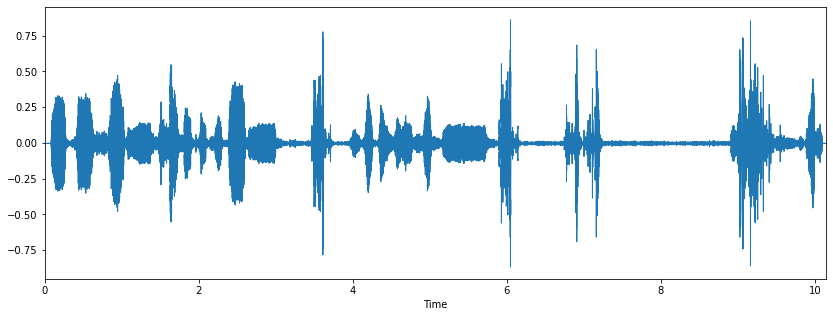

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [279]:
sample_length = len(x)/sr
fps = 30
frames = fps*sample_length
increment_length = len(x)/frames 

In [280]:
increment_length

735.0000000000001

In [281]:
frame_placements = []
current_sample = 0

for i in range(int(frames)):
    current_sample+=increment_length
    frame_placements.append(current_sample)

In [282]:
for i in range(len(frame_placements)):
    frame_placements[i] = round(frame_placements[i])

In [283]:
vals = []
for i in frame_placements:
    # vals.append((x[i] + x[i-1] + x[i+1])/3)
    vals.append(abs(x[i]))

In [284]:
# smooth the values w/a 3 value window
for i in range(len(vals)):
    if(i<len(vals)-1 and i>0):
        vals[i] = (vals[i] + vals[i-1] + vals[i+1])/3
# do it again just cause
for i in range(len(vals)):
    if(i<len(vals)-1 and i>0):
        vals[i] = (vals[i] + vals[i-1] + vals[i+1])/3
# do it again just cause
for i in range(len(vals)):
    if(i<len(vals)-1 and i>0):
        vals[i] = (vals[i] + vals[i-1] + vals[i+1])/3

In [285]:
# pop_threshold = 0.5*max(vals)
pop_threshold = 0
for i in vals:
    pop_threshold += i
pop_threshold = pop_threshold/len(vals)*threshold

In [286]:
import shutil
print("copying frams...")
os.chdir('/content/')
# shutil.copyfile('file1.txt', 'file2.txt')
!mkdir frames
for i in range(len(vals)):
    if (vals[i]>=pop_threshold):
        shutil.copyfile('/content/popop/imgs/open.png', '/content/frames/frame'+ str(i).rjust(9, '0') + '.png')
    else:
        shutil.copyfile('/content/popop/imgs/closed.png', '/content/frames/frame'+ str(i).rjust(9, '0') + '.png')
print("copied!")
os.chdir('frames')
!ffmpeg -r 30 -i frame%09d.png output.mp4
!mv /content/frames/output.mp4 /content/input_frames.mp4

copying frams...
copied!
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --en

In [287]:
os.chdir('/content/')
# !ffmpeg -i input_frames.mp4 -i input.wav -c copy -map 0:v:0 -map 1:a:0 output.mp4
!ffmpeg -i input_frames.mp4 -i input.wav -c copy o_temp.mp4
!ffmpeg -i o_temp.mp4 output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [288]:
!rm -r frames
!rm -r input_frames.mp4
!rm -r o_temp.mp4

# Result

In [289]:
from IPython.display import HTML
from base64 import b64encode
video_path = 'output.mp4'

mp4 = open(video_path,'rb').read()
decoded_vid = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=400 controls><source src={decoded_vid} type="video/mp4"></video>')